In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,r2_score,max_error,mean_absolute_error,median_absolute_error,mean_squared_error
from math import sqrt
import joblib
%matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [3]:
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df=pd.read_csv('COKINGCOAL.csv')

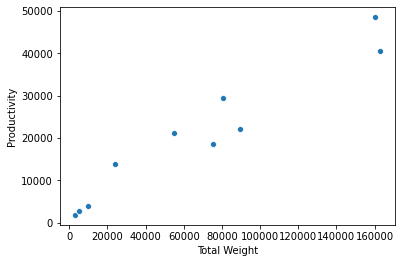

In [5]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [6]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000
mean,8777.636364,193722.727273,40.146364,56.598182,60899.363636,0.609091,0.060909,0.0,15.388182,0.0,18707.597273,98077.472727
std,106.156745,4155.240741,41.368811,66.876996,59293.606469,0.593674,0.059367,0.0,34.253303,0.0,15868.636481,55893.248725
min,8668.000000,190897.000000,0.000000,0.000000,3200.000000,0.030000,0.003000,0.0,0.000000,0.0,1849.120000,47767.000000
25%,8670.500000,191023.000000,0.000000,0.000000,7500.000000,0.075000,0.007500,0.0,0.000000,0.0,3386.375000,47767.000000
50%,8729.000000,191436.000000,41.530000,64.200000,54670.000000,0.550000,0.055000,0.0,0.000000,0.0,18668.500000,68103.600000
75%,8867.500000,196367.500000,72.360000,87.430000,84986.000000,0.850000,0.085000,0.0,12.585000,0.0,25816.800000,164666.000000
max,8928.000000,200262.000000,96.930000,212.780000,162651.000000,1.630000,0.163000,0.0,113.900000,0.0,48474.650000,169583.000000


In [7]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [8]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [9]:
print(lm.intercept_)

2046.44220282268


In [10]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.246338


In [11]:
predictions = lm.predict(X_test)

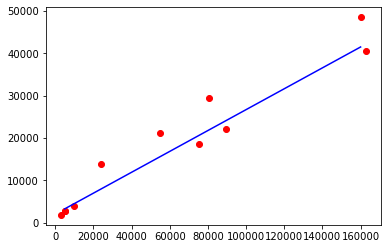

In [12]:
plt.scatter(X,y,color="red")
plt.plot(X_test, predictions, color="blue")

In [13]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test,predictions))

MAE: 4757.513432438915
MSE: 29240403.076404326
RMSE: 5407.4396045082485
r2_score: 0.8967000199646459


In [14]:
joblib.dump(lm,"Coking_Coal.pkl")

['Coking_Coal.pkl']